# Kirstinių metodas
> 1. Prisiskiriame dvi pradines sąlygas $x_0$ ir $x_1$ bei pasirenkame konvergavimo kriterijų $\varepsilon=(\varepsilon_1, \varepsilon_2)$.
> 2. Randame $f(x_k)$ ir apskaičiuojame:
  $$ \delta_k = -f(x_k)\frac{x_k - x_{k-1}}{f(x_k)-f(x_{k-1})}. $$
> 3. Apskaičiuojame:
  $$ x_{k+1} = x_k + \delta_k. $$
> 4. Jei $|x_{k+1} - x_k|<\varepsilon(1-|x_{k+1}|)$, tuomet einame į 5 žingsnį. Kitu atveju - grįžtame į 2.
> 5. Jei $|f(x_{k+1})|<\varepsilon_2$, tuomet stabdome algoritmą ir sprendinys $x^* = x_{k+1}$. Kitu atveju sprendinio neradome.

In [63]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [67]:
def solve_secant(F,x0,x1,N):
    if F(x0)*F(x1) >= 0:
        print("Kirstinių metodas nepavyko.")
        return None
    A_vec = x0
    B_vec = x1
    a_n = x0
    b_n = x1
    for n in range(1,N+1):
        m_n = a_n - F(a_n)*(b_n - a_n)/(F(b_n) - F(a_n))
        f_m_n = F(m_n)
        if F(a_n)*f_m_n < 0:
            a_n = a_n
            A_vec = np.vstack((A_vec, a_n))
            b_n = m_n
            B_vec = np.vstack((B_vec, b_n))
        elif F(b_n)*f_m_n < 0:
            a_n = m_n
            A_vec = np.vstack((A_vec, a_n))
            b_n = b_n
            B_vec = np.vstack((B_vec, b_n))
        elif f_m_n == 0:
            print("Rastas tikslus sprendinys.")
            return A_vec, B_vec
        else:
            print("Kirstinių metodas nepavyko.")
            return A_vec, B_vec
    return A_vec, B_vec

In [68]:
f = lambda x: 2*np.sin(x+np.pi/3)-x**2-1
a_vec, b_vec = solve_secant(f,-0.15,2,10)
print(a_vec[-1], b_vec[-1])

[0.91848501] [2]


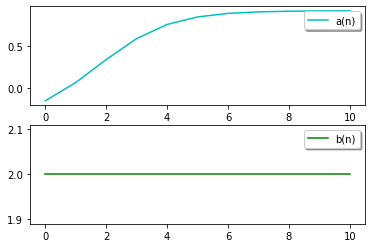

In [69]:
# Funkcijos grafikų braižymui
fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(len(a_vec)), a_vec, color='c', label="a(n)")
axs[1].plot(np.arange(len(b_vec)), b_vec, color='g', label="b(n)")
axs[0].legend(shadow=True, fancybox=True)
axs[1].legend(shadow=True, fancybox=True)
plt.show()